# StayEstimate - Data Exploration
Visualize the features and find the hidden connections

## Initialize Paths

In [1]:
#Input Path
Input='Input'
#Output Path
Output='Output'
#Transitional Path
Trans='Transitional'

## Import Libraries

In [2]:
from os.path import join
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 14})
sns.set(style='whitegrid', font_scale=1.5, color_codes=True)

## Load Cleaned Data

In [3]:
df=DataFrame.from_csv(join(Trans,'df_5yr_cleaned.csv'))

In [4]:
df.columns

Index([u'Gender', u'Age', u'Race', u'Severity', u'Mortality', u'DRG',
       u'MedicalSurgical', u'Admission', u'AdmitDay', u'Disposition',
       u'DischDay', u'Total_Charges', u'Year', u'Stay_Length'],
      dtype='object')

### Histogram of Patient's Length of Stay (Less than 60 days) 

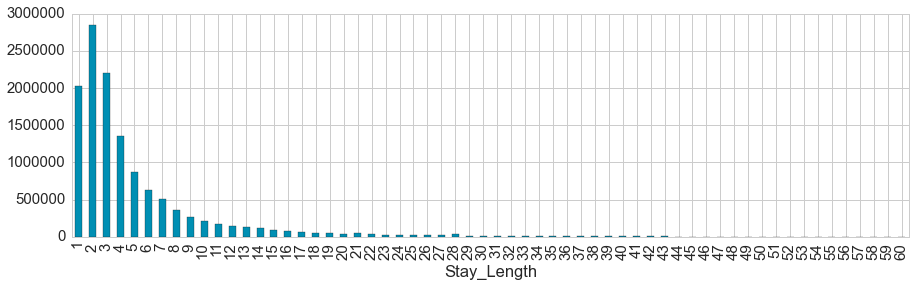

In [5]:
plt.figure(figsize=[15,4])
(df.groupby('Stay_Length')
 .count()
 .sort_index(inplace=False,ascending=True)
 .iloc[:60,0]
 .plot(kind='bar',color='#008fb3')
 )

### Looking at only 10 Diagnoses

In [6]:
cats=['ACUTE CVD','APPENDICITIS','ABDOMINAL HERNIA','ARM FRACTURE','COLON CANCER','LEUKEMIAS',
        'HEART VALVE DISORDER','ANEURYSM','INTRACRANIAL INJURY','INTESTINAL OBSTRUCTION']

In [7]:
df10=df.ix[cats]

In [8]:
df10['Diagnosis']=df10.index

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Violin Plots

In [9]:
def plot_vio(df,col,order=None, hue="Gender",hue_order=['F','M'],colors = ['#ff80aa','#2eb8b8'],figsize=(15, 8)):
    f, ax = plt.subplots(figsize=figsize)
    sns.violinplot(x=col, y="Stay_Length", hue=hue, palette= sns.color_palette(colors), order=order,
                   data=df,split=True,bw=.1, cut=1, linewidth=0.5,hue_order=hue_order)
    # Finalize the figure
    ax.set(ylim=(.99, 121));
    ax.set_yscale('log')
    sns.despine(left=True, bottom=True);
    plt.xticks(rotation=45,ha="right");
    plt.yticks([1,2,3,4,5,7,14,30,60,90,120],['1-Day','2-Days','3-Days','4-Days','5-Days','1 Week',
                                              '2 Weeks','1 Month','2 Months', '3 Months','4 Months']);

## 10 Different Diagnoses and the Length of Stay

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


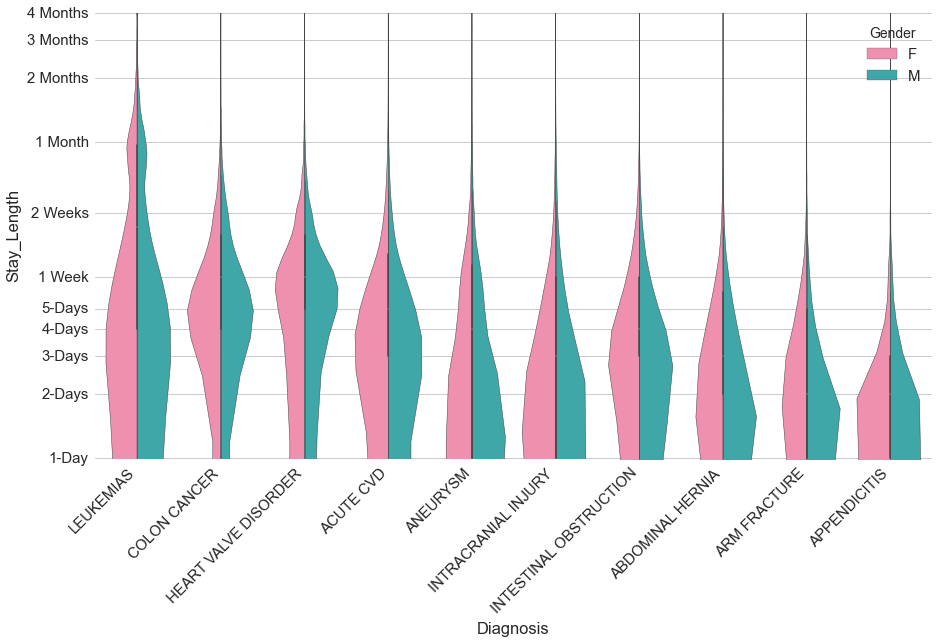

In [10]:
plot_vio(df10,"Diagnosis",order=['LEUKEMIAS', 'COLON CANCER', 'HEART VALVE DISORDER', 'ACUTE CVD',
                           'ANEURYSM', 'INTRACRANIAL INJURY', 'INTESTINAL OBSTRUCTION', 
                           'ABDOMINAL HERNIA','ARM FRACTURE', 'APPENDICITIS'])

### Effect of Age on Length of Stay

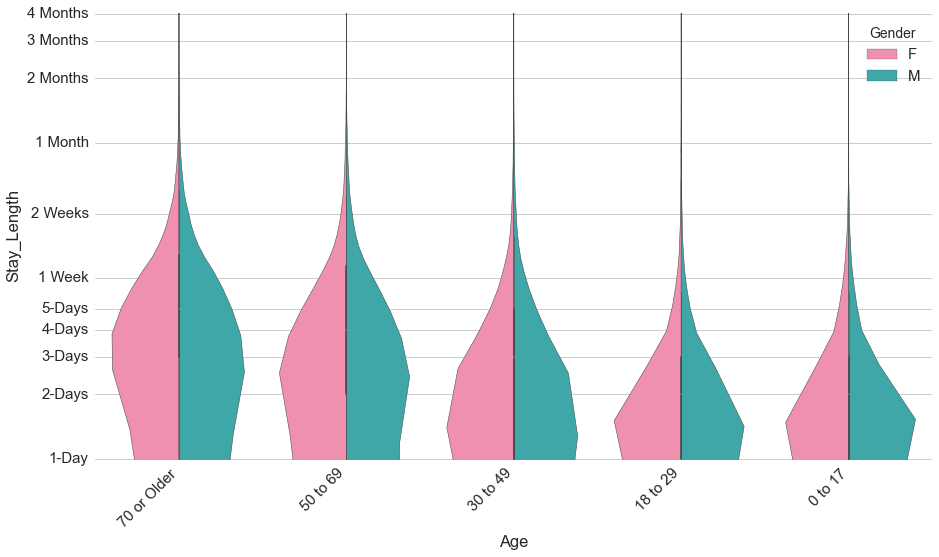

In [11]:
plot_vio(df10,"Age",order=['70 or Older','50 to 69','30 to 49', '18 to 29','0 to 17'])

### Effect of Severity of Illness on Length of Stay

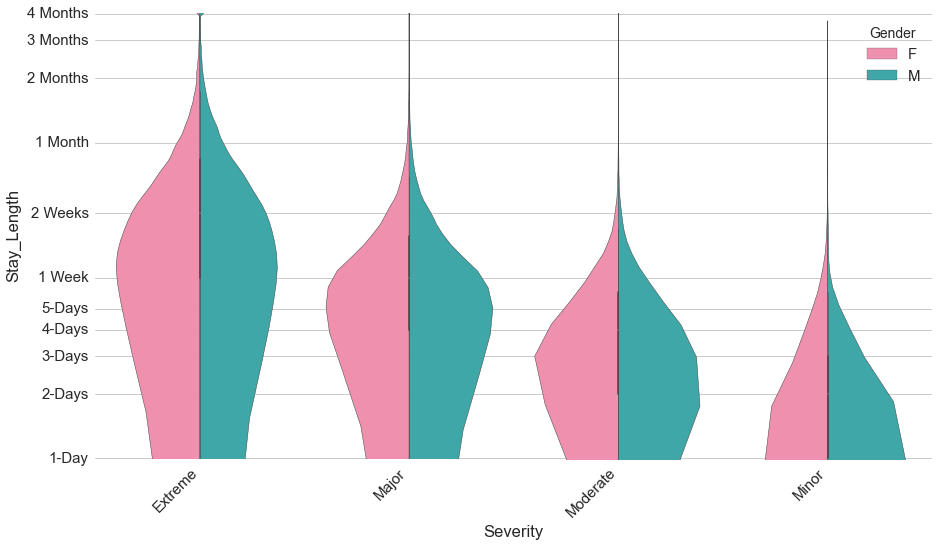

In [12]:
plot_vio(df10,"Severity",order=['Extreme', 'Major','Moderate','Minor'])

### Effect of Risk of Mortality on Length of Stay

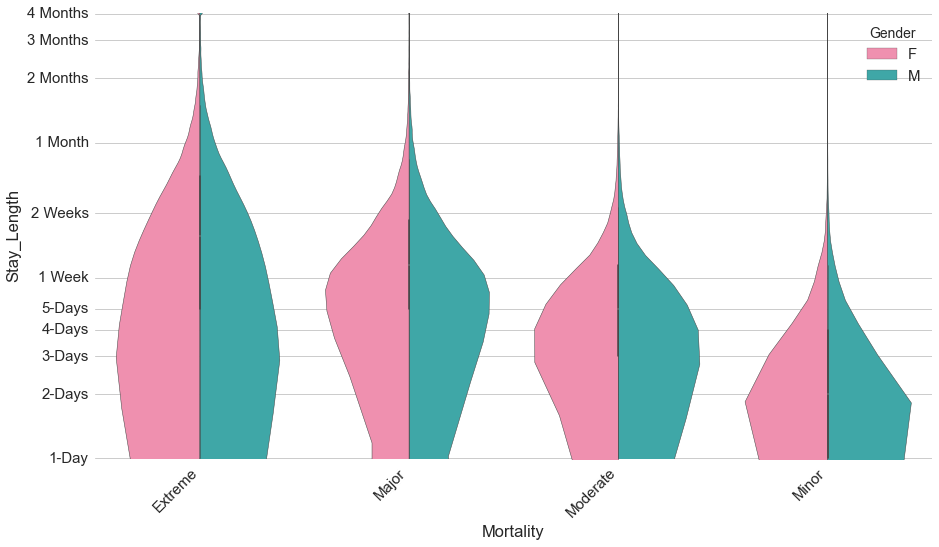

In [13]:
plot_vio(df10,"Mortality",order=['Extreme', 'Major','Moderate','Minor'])

### Effect of Admission Day on Length of Stay

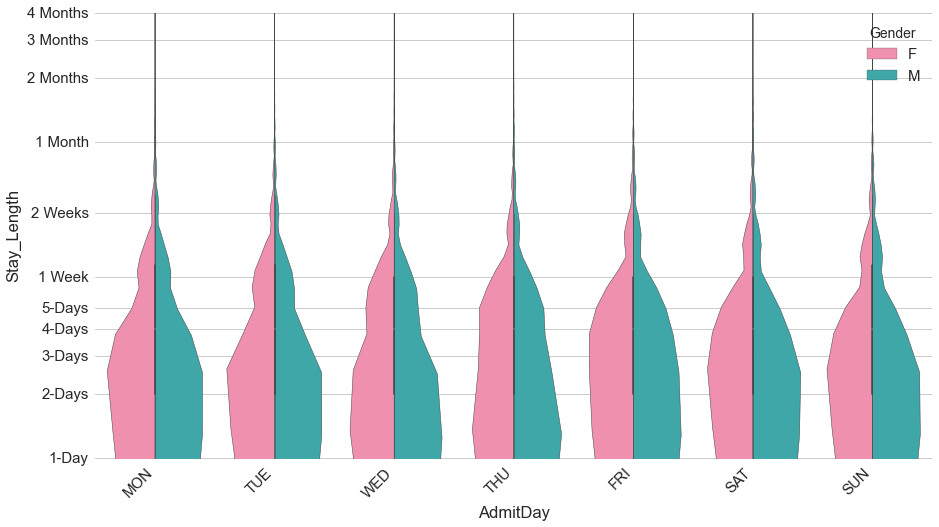

In [14]:
plot_vio(df10,"AdmitDay",order=['MON','TUE','WED','THU','FRI','SAT','SUN'])

### Effect of Admission Type on Length of Stay

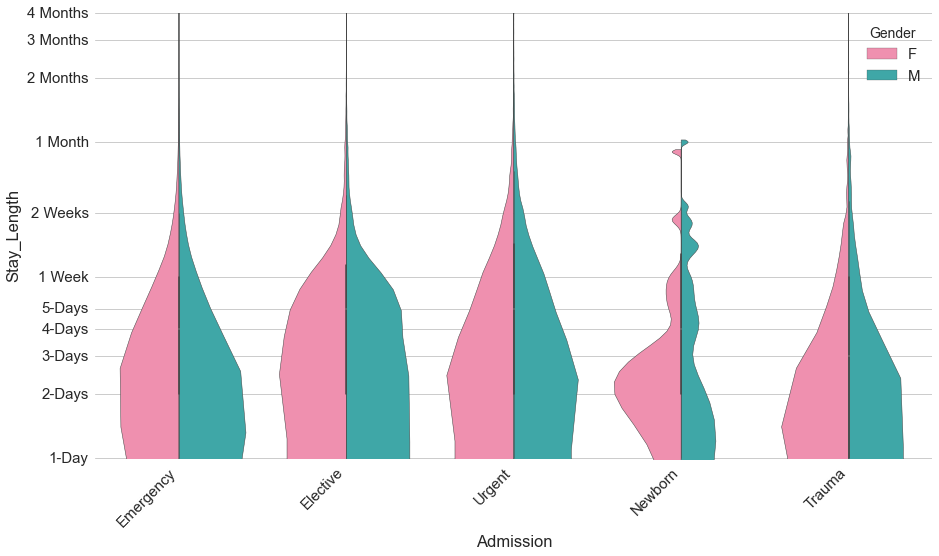

In [15]:
plot_vio(df10,"Admission")

### Record Proportions of Different Admission Types

In [16]:
# group and count by Admission Type 
Type_Count=(df10
          .groupby('Admission')
          .count()
          .iloc[:,0]
          )
#sort and combine small portions to "Others"
Type_Count=Type_Count.sort(ascending=False,inplace=False)

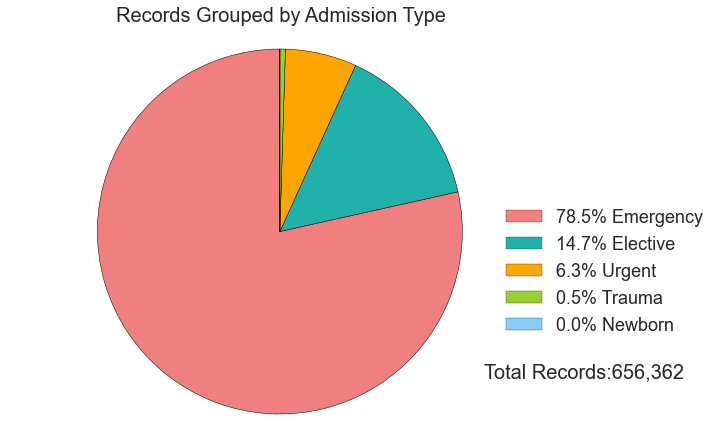

In [17]:
#plot the data
type_cnt=Type_Count.values
type_name=Type_Count.index  
percent=np.round(1.0*type_cnt/sum(type_cnt),3)*100
label=[str(percent[i])+'% '+type_name[i] for i in range(len(type_cnt))]
colors=['lightcoral','lightseagreen','orange','yellowgreen','lightskyblue', 'gold','lightgray']
patches, texts = plt.pie(type_cnt,colors=colors, shadow=False, startangle=90)
plt.legend(patches, label, loc=(0.9, 0.2),frameon=False,fontsize=18)
plt.axis('equal')
plt.tight_layout()
for w in patches:
    w.set_linewidth( 0.5 )
    w.set_edgecolor( 'black' )
    
plt.text(1.12, -0.8, 'Total Records:'+ "{:,}".format(np.round(type_cnt.sum())), fontsize=20) 
plt.title("Records Grouped by Admission Type\n", fontsize=20)


### Effect of Day of Admission and Proportion of Alive vs. Expired

In [18]:
df10['Disposition'][df10['Disposition']!='Expired']='Y'
df10['Disposition'][df10['Disposition']=='Expired']='N'

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/pandas/core/generic.py:3572: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Python/2.7/site-packages/ipy

In [19]:
temp=df10.ix['ACUTE CVD'] ### Acute CerebroVascular Disease
temp=temp[temp.Stay_Length==1]## One-day stay

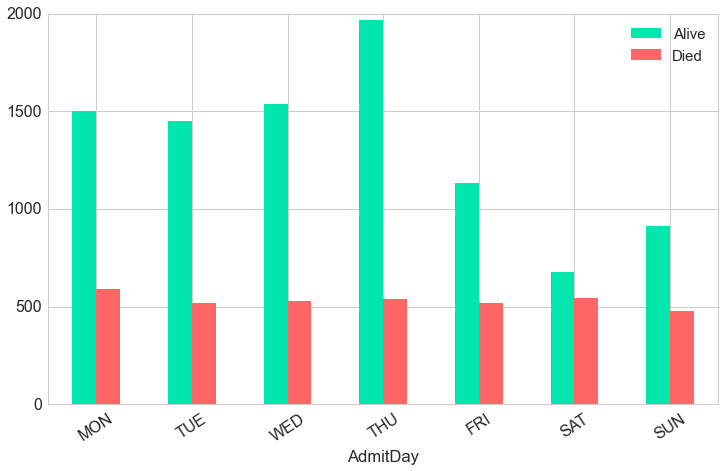

In [20]:
#number of patients that died on the weekends
a=DataFrame(temp[temp['Disposition']=='Y'].groupby('AdmitDay').count()['Stay_Length'])
a=a.rename(columns={'Stay_Length':'Alive'})
a['Died']=temp[temp['Disposition']=='N'].groupby('AdmitDay').count()['Stay_Length']
a=a.reindex([u'MON', u'TUE', u'WED', u'THU', u'FRI', u'SAT', u'SUN'])
a.plot(kind='bar',fontsize=16,figsize=(12, 7),color=['#00e6ac','#ff6666'],
                  edgecolor = "none",rot =33)

### Rearrange the Dataframe for Parallel Coordinate Visualization

In [21]:
ord_keys={ '0 to 17':10, '18 to 29':30,'30 to 49':50,'50 to 69':70,'70 or Older':90,
          'Minor':20, 'Moderate':40, 'Major':60, 'Extreme':80,
          'Medical':25, 'Surgical':75, 'M':25, 'F':75,'Y':75,'N':25
         }

In [22]:
df10p=df10.loc['ACUTE CVD',['Gender','Age','Severity','Mortality','MedicalSurgical','Disposition','Stay_Length']]
df10p.iloc[:,:-1]=df10p.iloc[:,:-1].applymap(lambda x:ord_keys[x])

In [23]:
# parallel_coordinates_2 visualization function adopted from:
##http://stackoverflow.com/questions/23547347/parallel-coordinates-plot-for-continous-data-in-pandas
def parallel_coordinates_2(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure(figsize=(14, 6),)
    ax = plt.gca()
    plt.set_cmap('hot')
    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y
                , color=Colorm((kls - class_min)/(class_max-class_min))
                , alpha=0.01, **kwds)
        

    for i in x:
        ax.axvline(i, linewidth=1, color='gray')
        
    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_yticks([])
    ax.tick_params(labelsize=18)
    ax.tick_params(axis='x', pad=15)
    ax.set_xlim(x[0], x[-1])
    xlabels = ax.get_xticklabels()
    #for label in xlabels:
    #    label.set_rotation(30)
    #ax.legend(loc='upper right')
    #ax.grid()
    

#     bounds = np.linspace(class_min,class_max,5)
#     cax,_ = mpl.colorbar.make_axes(ax)
#     cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, 
#                                    boundaries=bounds, format='%.2f')

    return ax

### Parallel Coordinate Visualization for ACUTE CVD

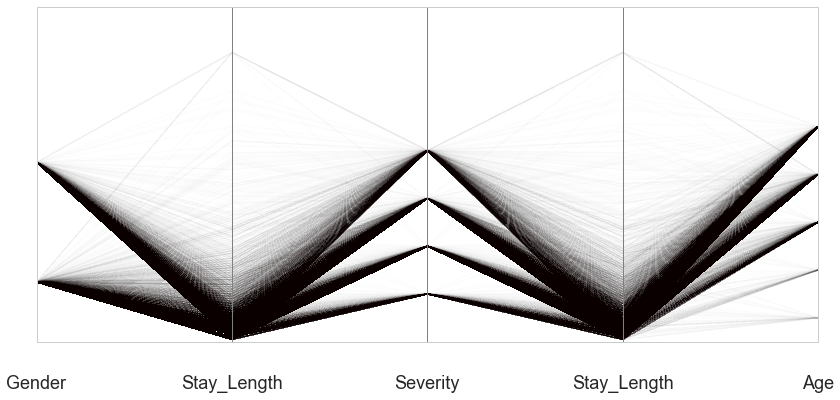

In [24]:
parallel_coordinates_2(df10p.ix[:10000,['Gender', 'Stay_Length','Severity',
                                        'Stay_Length','Disposition','Age']],'Disposition')
